# Measuring the Efficacy of RapidVac ULPA Filters

## Loading the CSV files (tab-delimited)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
filename1 = 'input/jan24.csv'
filename2 = 'input/jan24_2.csv'

# Read both CSV files, skipping over hardward information in top two rows
data1 = pd.read_csv(filename1, encoding='latin_1', delimiter='\t', skiprows=2)
data2 = pd.read_csv(filename2, encoding='latin_1', delimiter='\t', skiprows=2)

# Convert time columns to datetime format
data1['Time'] = pd.to_datetime(data1['Time'], errors='coerce')
data2['Time'] = pd.to_datetime(data2['Time'], errors='coerce')

/var/folders/0w/yskjxvxd4zz5kkm4l_4_m37c0000gn/T/ipykernel_3983/2007051215.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Time'] = pd.to_datetime(data1['Time'], errors='coerce')
/var/folders/0w/yskjxvxd4zz5kkm4l_4_m37c0000gn/T/ipykernel_3983/2007051215.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Time'] = pd.to_datetime(data2['Time'], errors='coerce')


## Merge and align the two datasets according to "Time" column

In [38]:
# Merge the two datasets on time (inner join to match timestamps)
merged_data = pd.merge(data1, data2, on='Time', how='inner')

# Update these based on actual column names from the merge
inlet_concentration = merged_data['Concentration A, PPM_x']
outlet_concentration = merged_data['Concentration A, PPM_y']

## Plot the pre- and post- concentrations as a function of time

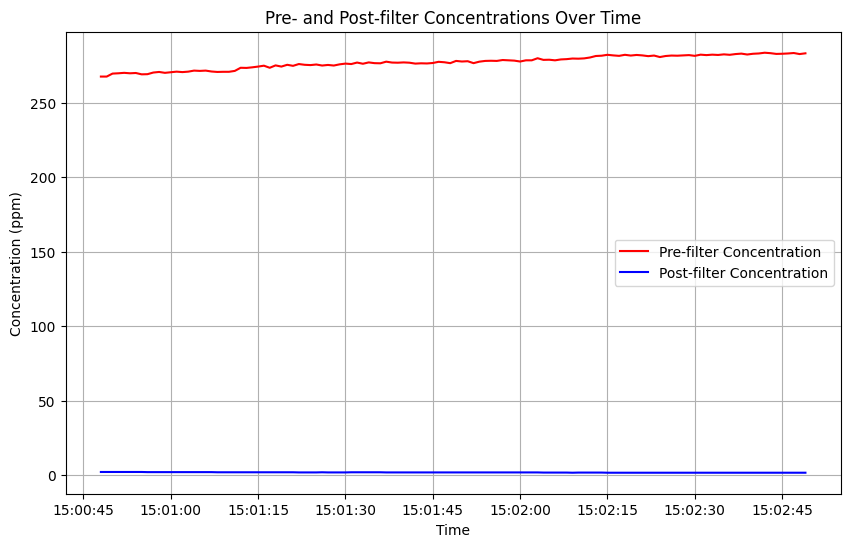

In [39]:
# Plot pre- and post- filter concentrations
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Time'], merged_data['Concentration A, PPM_x'], label='Pre-filter Concentration', color='red')
plt.plot(merged_data['Time'], merged_data['Concentration A, PPM_y'], label='Post-filter Concentration', color='blue')

# Add labels, legend, and grid
plt.xlabel('Time')
plt.ylabel('Concentration (ppm)')
plt.title('Pre- and Post-filter Concentrations Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Calculate the efficiency of the filter as a percent

In [40]:
# Calculate filter efficiency
efficiency = ((inlet_concentration - outlet_concentration) / inlet_concentration) * 100

## Plot the filter efficiency

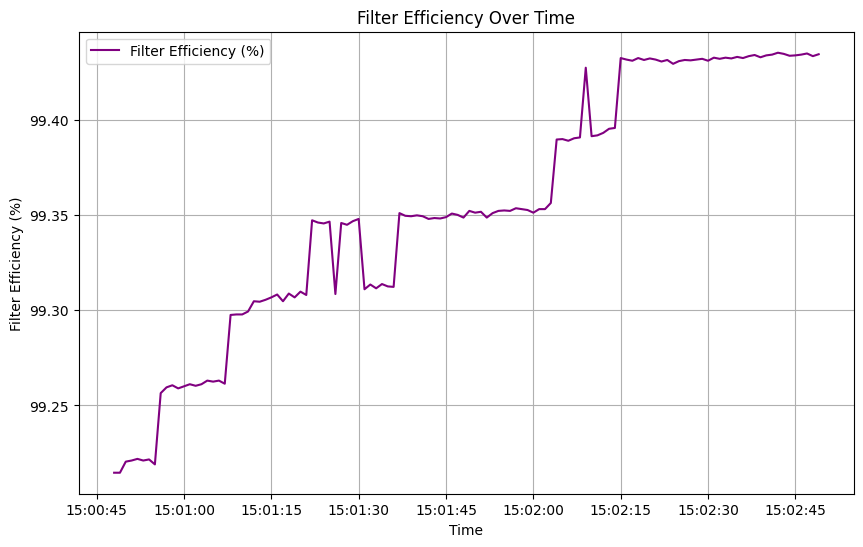

Average filter efficiency: 99.35305091966576%.


In [41]:
# Plot filter efficiency over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Time'], efficiency, label='Filter Efficiency (%)', color='purple')

# Add labels, legend, and grid
plt.xlabel('Time')
plt.ylabel('Filter Efficiency (%)')
plt.title('Filter Efficiency Over Time')
plt.legend()
plt.grid(True)
plt.show()

print(f'Average filter efficiency: {np.mean(efficiency)}%.')